## Code for Viz 
#### (we'll move it into scripts — easier for later viz with new X_train, hyperparameters, models)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import config 

npz = np.load(config.RAW_DATA) 
X_train   = pd.DataFrame(npz["X_train"])
y_train   = pd.DataFrame(npz["y_train"])

# Advanced Data Visualizations for Preprocessing Motivation
These visualizations help identify missing data patterns, outliers, feature distributions, correlations, and categorical feature properties. Use these insights to design a top-tier preprocessing pipeline.

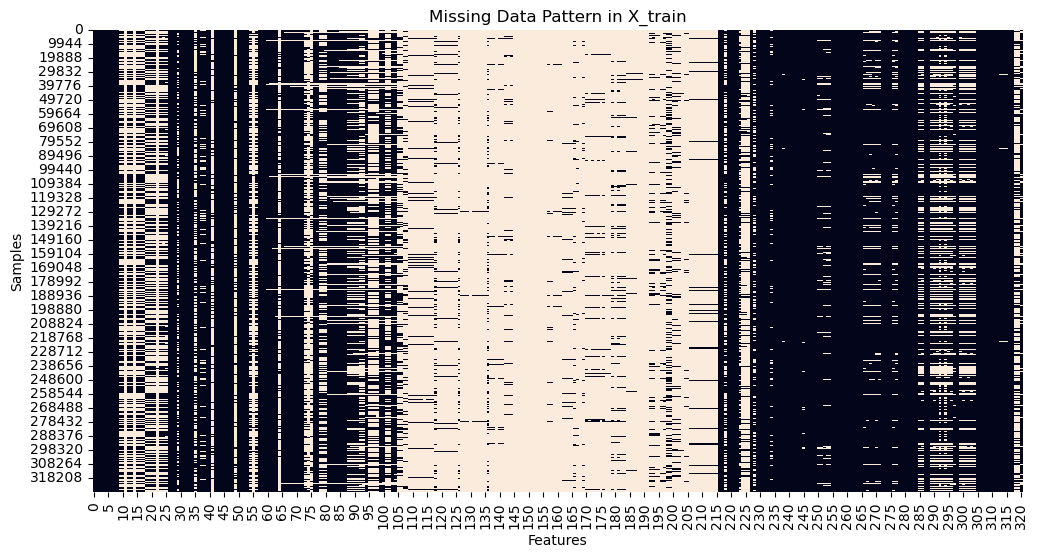

In [7]:
# 1. Visualize missing data pattern
plt.figure(figsize=(12,6))
sns.heatmap(X_train.isna(), cbar=False)
plt.title('Missing Data Pattern in X_train')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

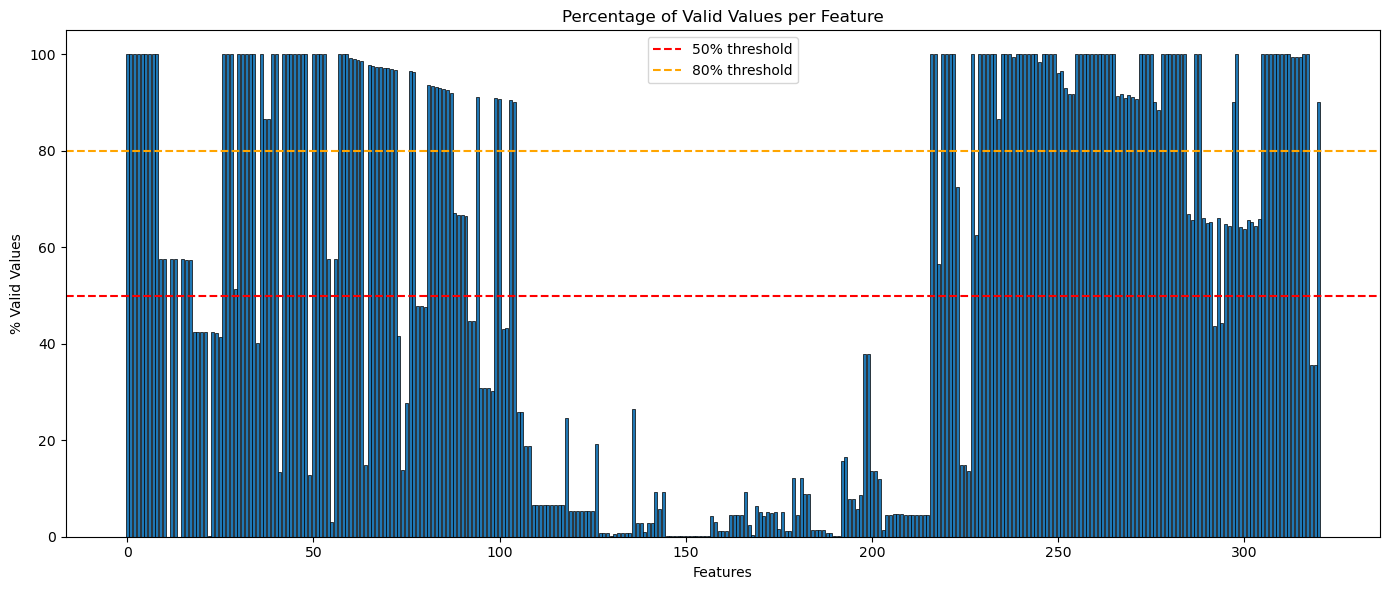

Features with <50% valid: 147
Features with <20% valid: 116
Features with <5% valid: 68


In [41]:
# Percentage of valid values per feature
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
valid_percentages = ((X_train[num_cols].notna().sum() / len(X_train)) * 100).values

plt.figure(figsize=(14, 6))
plt.bar(range(len(num_cols)), valid_percentages, edgecolor='black', linewidth=0.5)
plt.xlabel('Features')
plt.ylabel('% Valid Values')
plt.title('Percentage of Valid Values per Feature')
plt.axhline(y=50, color='red', linestyle='--', label='50% threshold')
plt.axhline(y=80, color='orange', linestyle='--', label='80% threshold')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Features with <50% valid: {(valid_percentages < 50).sum()}")
print(f"Features with <20% valid: {(valid_percentages < 20).sum()}")
print(f"Features with <5% valid: {(valid_percentages < 5).sum()}")


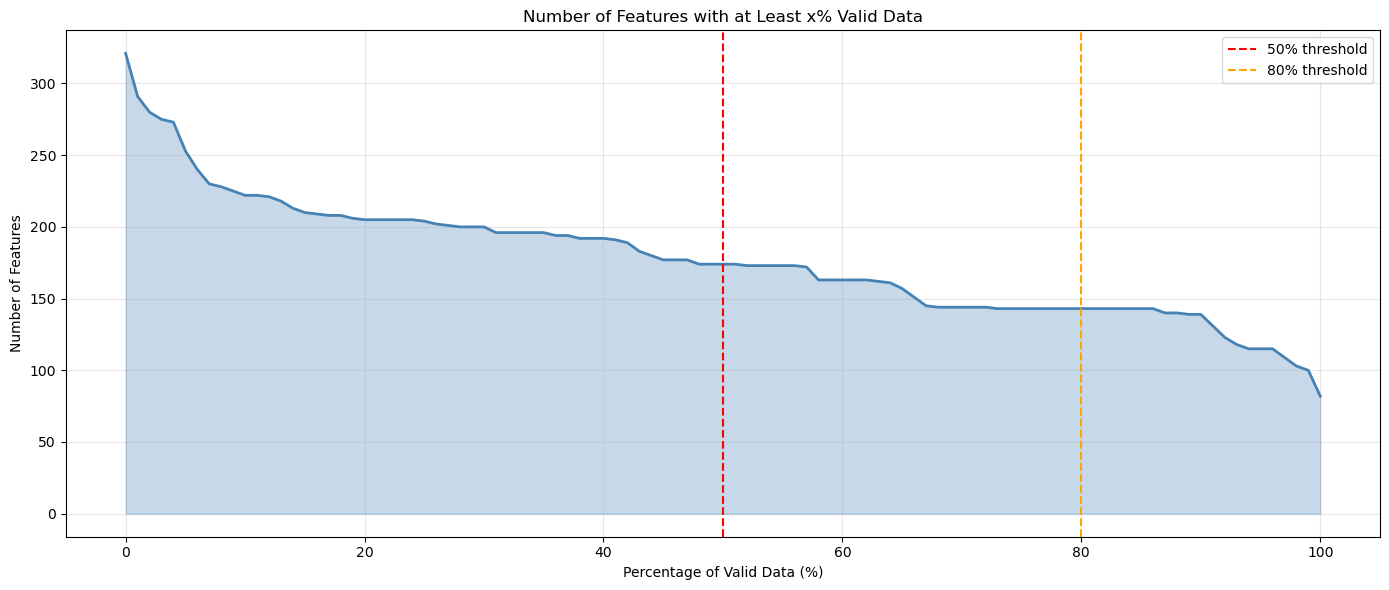

Features with at least 100% valid data: 82
Features with at least 80% valid data: 143
Features with at least 50% valid data: 174
Features with at least 20% valid data: 205
Features with at least 10% valid data: 222

Features with less than 5% valid data: 68


In [48]:
# Number of features with at least x% valid data
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
valid_percentages = ((X_train[num_cols].notna().sum() / len(X_train)) * 100).values

# Calculate cumulative count: for each percentage threshold, count features with at least that % valid
percentage_thresholds = np.arange(0, 101, 1)
features_count = [np.sum(valid_percentages >= thresh) for thresh in percentage_thresholds]

plt.figure(figsize=(14, 6))
plt.plot(percentage_thresholds, features_count, linewidth=2, color='steelblue')
plt.fill_between(percentage_thresholds, features_count, alpha=0.3, color='steelblue')
plt.xlabel('Percentage of Valid Data (%)')
plt.ylabel('Number of Features')
plt.title('Number of Features with at Least x% Valid Data')
plt.grid(True, alpha=0.3)
plt.axvline(x=50, color='red', linestyle='--', label='50% threshold', linewidth=1.5)
plt.axvline(x=80, color='orange', linestyle='--', label='80% threshold', linewidth=1.5)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Features with at least 100% valid data: {np.sum(valid_percentages >= 100)}")
print(f"Features with at least 80% valid data: {np.sum(valid_percentages >= 80)}")
print(f"Features with at least 50% valid data: {np.sum(valid_percentages >= 50)}")
print(f"Features with at least 20% valid data: {np.sum(valid_percentages >= 20)}")
print(f"Features with at least 10% valid data: {np.sum(valid_percentages >= 10)}")
print(f"\nFeatures with less than 5% valid data: {np.sum(valid_percentages < 5)}")

In [40]:
# 2. Feature distributions and outlier detection (Interactive)
from ipywidgets import interact, IntSlider
import ipywidgets as widgets

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
total_features = len(num_cols)
features_per_page = 25

def plot_distributions(start_idx=0):
    """Plot feature distributions for a given range of features."""
    end_idx = min(start_idx + features_per_page, total_features)
    current_features = num_cols[start_idx:end_idx]
    num_features = len(current_features)
    
    # Calculate grid size (5x5 for 25 features)
    cols = 5
    rows = 5
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 16))
    axes = axes.ravel()
    
    for idx, col in enumerate(current_features):
        valid_count = X_train[col].dropna().shape[0]
        sns.histplot(X_train[col].dropna(), bins=50, ax=axes[idx], kde=True)
        axes[idx].set_title(f'{col}')
        axes[idx].set_xlabel('')  # Remove x-axis label
        # Add valid data count in top right corner
        axes[idx].text(0.95, 0.95, f'{valid_count}', 
                      transform=axes[idx].transAxes, 
                      fontsize=9, verticalalignment='top', 
                      horizontalalignment='right',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Hide unused subplots if there are fewer than 25 features
    for idx in range(num_features, rows * cols):
        axes[idx].set_visible(False)
    
    # Add general title
    fig.suptitle(f'Distribution - Features {start_idx + 1} to {end_idx - 1} of {total_features -1 } (idx starts at 0)', 
                 fontsize=16, fontweight='bold', y=0.995)
    
    plt.tight_layout()
    plt.show()

# Create interactive slider
max_start = max(0, total_features - features_per_page)
interact(plot_distributions, 
         start_idx=IntSlider(min=0, max=max_start, step=features_per_page, 
                            value=0, description='Start Index:'))


interactive(children=(IntSlider(value=0, description='Start Index:', max=296, step=25), Output()), _dom_classe…

<function __main__.plot_distributions(start_idx=0)>

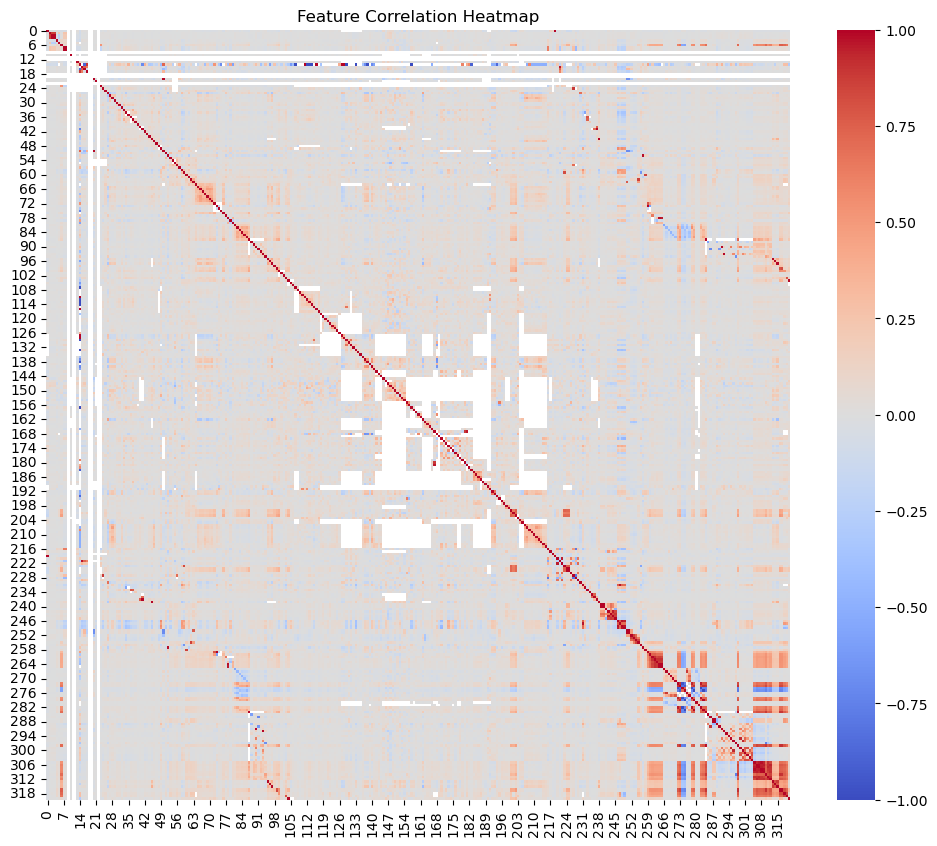

In [9]:
# 3. Correlation heatmap (multicollinearity check)
corr = X_train[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [29]:
# 4. Categorical feature cardinality and distribution
cat_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols[:5]:
    plt.figure(figsize=(8,3))
    sns.countplot(x=X_train[col])
    plt.title(f'Value Counts: {col}')
    plt.show()


## Feature Selection Analysis

**Current Approach:**
- Only removes **constant columns** (all values the same)
- Only removes **NA-only columns** (all values missing)


**New Approach:**
- **Variance threshold:** Remove features with variance below a threshold
- **Correlation analysis:** Remove one of each pair of highly correlated features (|r| > 0.95)
- **Feature-target correlation:** Keep features with strong relationship to target
- **Model-based importance:** Use models to rank feature importance
- **Dimensionality reduction:** PCA/feature selection to reduce feature space


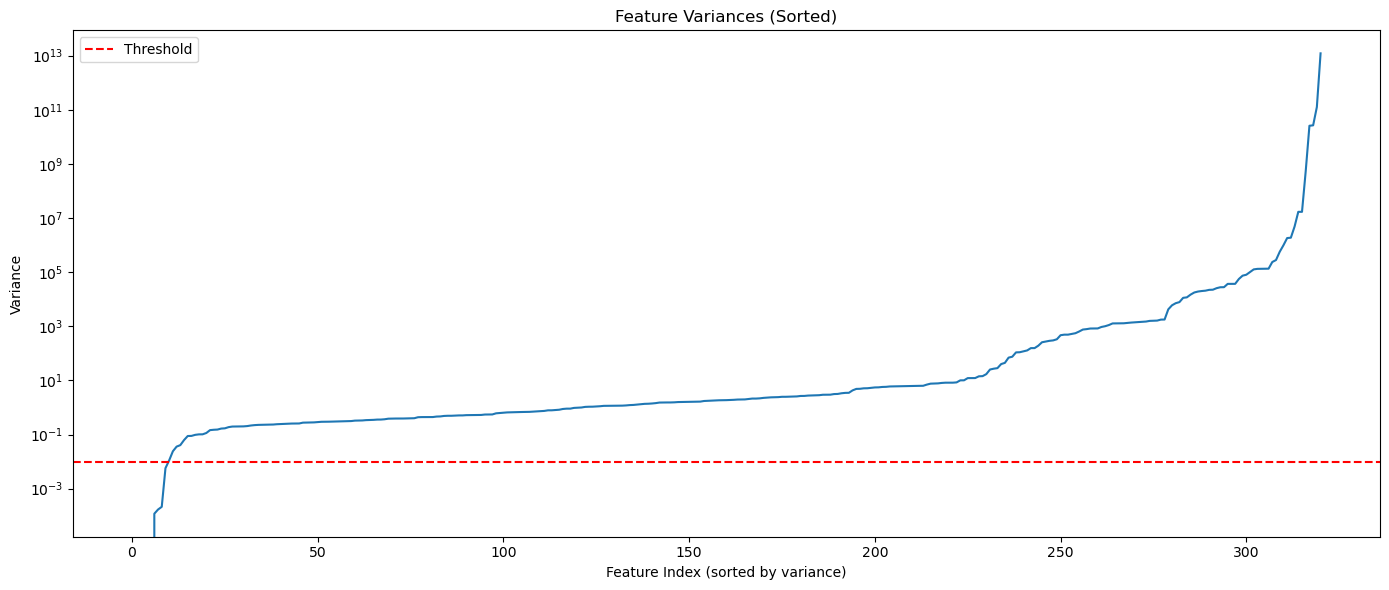

Number of features with variance < 1 : 122
Number of features with variance < 0.01: 10
Number of features with variance < 0.001: 9
Number of features with variance == 0: 6


In [ ]:
# 1. Variance Analysis - Identify low-variance features
variances = X_train[num_cols].var().sort_values()


plt.plot(range(len(variances)), variances.values)
plt.xlabel('Feature Index (sorted by variance)')
plt.ylabel('Variance')
plt.title('Feature Variances (Sorted)')
plt.axhline(y=0.01, color='red', linestyle='--', label='Threshold')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Number of features with variance < 1 : {(variances < 1).sum()}")
print(f"Number of features with variance < 0.01: {(variances < 0.01).sum()}")
print(f"Number of features with variance < 0.001: {(variances < 0.001).sum()}")
print(f"Number of features with variance == 0: {(variances == 0).sum()}")

In [50]:
# 2. Multicollinearity Analysis - Find highly correlated feature pairs
corr_matrix = X_train[num_cols].corr().abs()

# Get upper triangle of correlation matrix (avoid duplicates)
upper_tri = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.95:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print(f"Number of feature pairs with |correlation| > 0.95: {len(high_corr_pairs)}")

Number of feature pairs with |correlation| > 0.95: 59


Number of feature pairs with |correlation| > 0.95: 59

Top 10 highly correlated pairs:
  Feature 7 & 8: r = 1.000
  Feature 14 & 111: r = 1.000
  Feature 14 & 112: r = 1.000
  Feature 14 & 113: r = 1.000
  Feature 14 & 114: r = 1.000
  Feature 14 & 116: r = 1.000
  Feature 14 & 127: r = 1.000
  Feature 14 & 128: r = 1.000
  Feature 14 & 129: r = 1.000
  Feature 14 & 133: r = 1.000


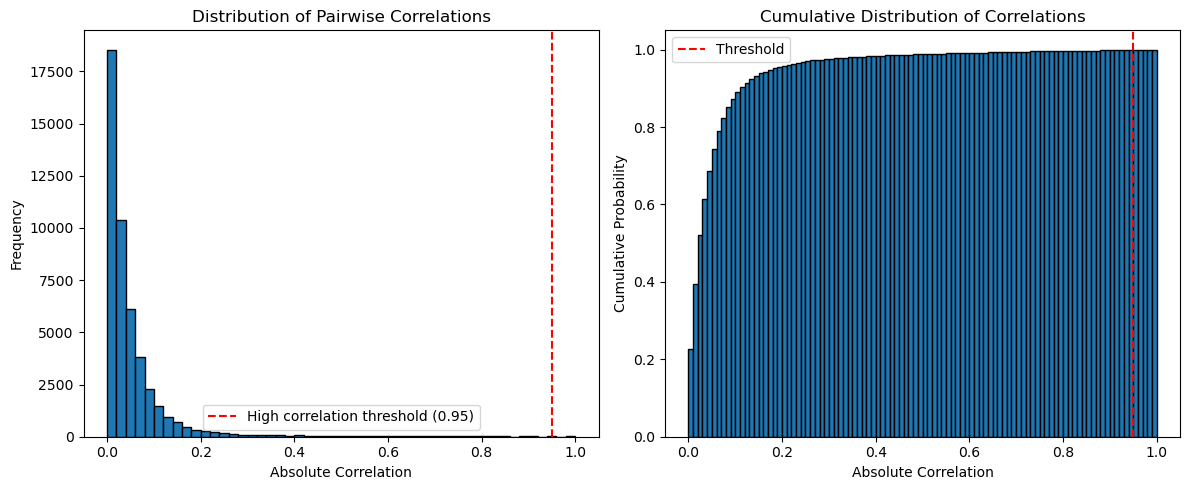

In [ ]:
# 2. Multicollinearity Analysis - Find highly correlated feature pairs
corr_matrix = X_train[num_cols].corr().abs()

# Get upper triangle of correlation matrix (avoid duplicates)
upper_tri = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.95:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print(f"Number of feature pairs with |correlation| > 0.95: {len(high_corr_pairs)}")

if high_corr_pairs:
    print("\nTop 10 highly correlated pairs:")
    for pair in sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)[:10]:
        print(f"  Feature {pair[0]} & {pair[1]}: r = {pair[2]:.3f}")

# Visualize correlation distribution
corr_values = corr_matrix.where(upper_tri).values.flatten()
corr_values = corr_values[~np.isnan(corr_values)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(corr_values, bins=50, edgecolor='black')
plt.xlabel('Absolute Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Pairwise Correlations')
plt.axvline(x=0.95, color='red', linestyle='--', label='High correlation threshold (0.95)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(corr_values, bins=100, cumulative=True, density=True, edgecolor='black')
plt.xlabel('Absolute Correlation')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Correlations')
plt.axvline(x=0.95, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/ada/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/ada/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


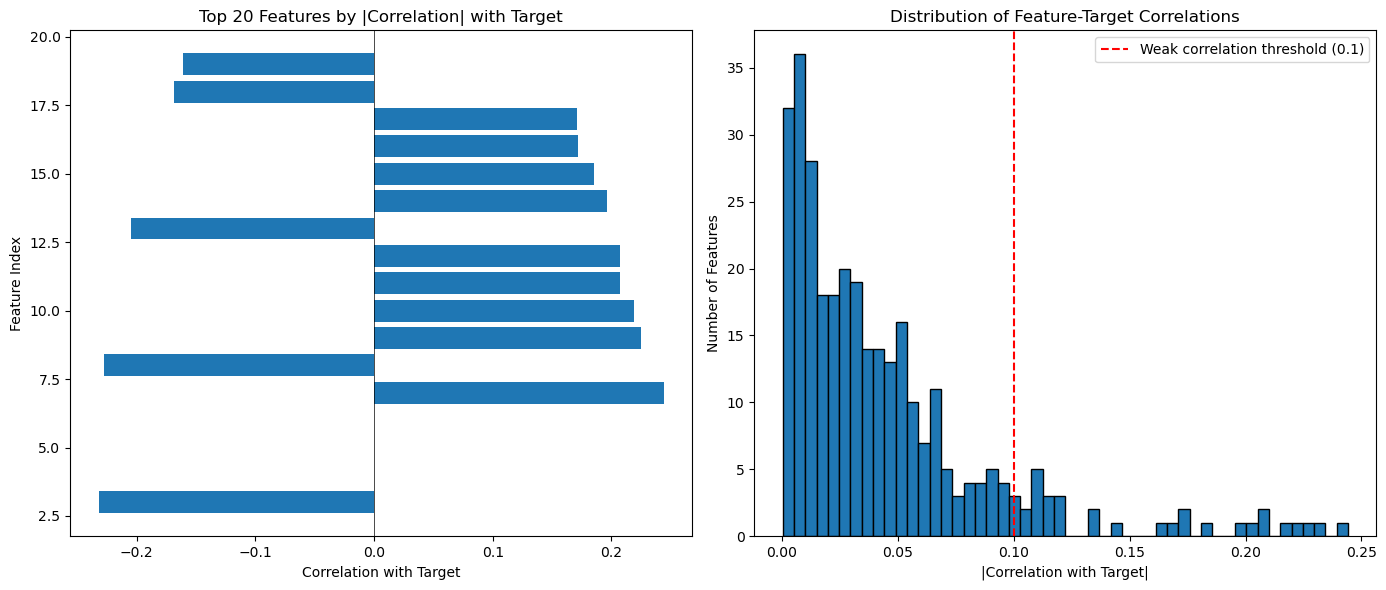

Features with |correlation| > 0.3: 0
Features with |correlation| > 0.1: 31
Features with |correlation| < 0.05: 213


In [33]:
# 3. Feature-Target Correlation Analysis
# Calculate correlation between each feature and target
y_train_series = y_train.iloc[:, 0] if isinstance(y_train, pd.DataFrame) else y_train

feature_target_corr = []
for col in num_cols:
    # Remove NaN values for correlation calculation
    valid_idx = ~(X_train[col].isna() | y_train_series.isna())
    if valid_idx.sum() > 10:  # Need enough samples
        corr_val = np.corrcoef(X_train[col][valid_idx], y_train_series[valid_idx])[0, 1]
        feature_target_corr.append((col, corr_val))

# Sort by absolute correlation
feature_target_corr.sort(key=lambda x: abs(x[1]), reverse=True)

# Plot
correlations = [x[1] for x in feature_target_corr]
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(range(min(20, len(correlations))), [correlations[i] for i in range(min(20, len(correlations)))])
plt.xlabel('Correlation with Target')
plt.ylabel('Feature Index')
plt.title('Top 20 Features by |Correlation| with Target')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.hist([abs(c) for c in correlations], bins=50, edgecolor='black')
plt.xlabel('|Correlation with Target|')
plt.ylabel('Number of Features')
plt.title('Distribution of Feature-Target Correlations')
plt.axvline(x=0.1, color='red', linestyle='--', label='Weak correlation threshold (0.1)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Features with |correlation| > 0.3: {sum(1 for c in correlations if abs(c) > 0.3)}")
print(f"Features with |correlation| > 0.1: {sum(1 for c in correlations if abs(c) > 0.1)}")
print(f"Features with |correlation| < 0.05: {sum(1 for c in correlations if abs(c) < 0.05)}")

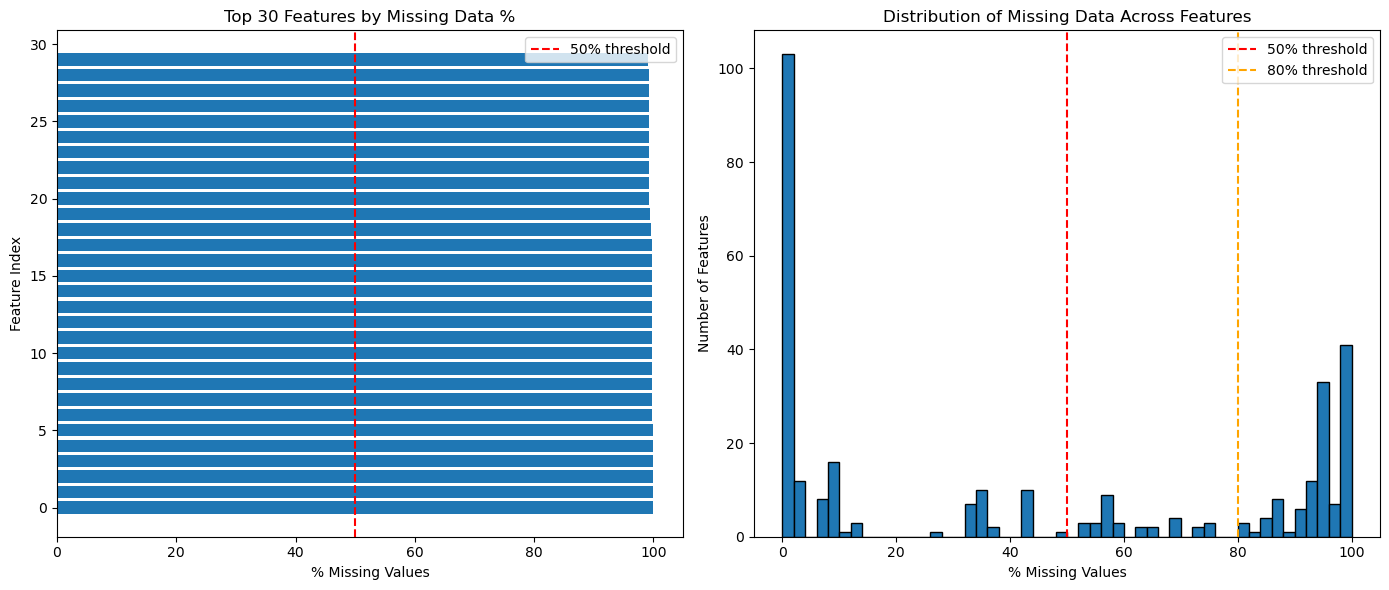

Features with >50% missing: 147
Features with >80% missing: 116
Features with >95% missing: 68


In [34]:
# 4. Missing Data Impact on Features
missing_percentages = (X_train[num_cols].isna().sum() / len(X_train) * 100).sort_values(ascending=False)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(range(min(30, len(missing_percentages))), missing_percentages.values[:30])
plt.xlabel('% Missing Values')
plt.ylabel('Feature Index')
plt.title('Top 30 Features by Missing Data %')
plt.axvline(x=50, color='red', linestyle='--', label='50% threshold')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(missing_percentages, bins=50, edgecolor='black')
plt.xlabel('% Missing Values')
plt.ylabel('Number of Features')
plt.title('Distribution of Missing Data Across Features')
plt.axvline(x=50, color='red', linestyle='--', label='50% threshold')
plt.axvline(x=80, color='orange', linestyle='--', label='80% threshold')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Features with >50% missing: {(missing_percentages > 50).sum()}")
print(f"Features with >80% missing: {(missing_percentages > 80).sum()}")
print(f"Features with >95% missing: {(missing_percentages > 95).sum()}")

## Summary: Feature Selection Strategy

Based on the visualizations above, here's a robust feature selection pipeline:

### 1. **Remove Features with High Missing Data**
- Remove features with >80% missing values (they provide little information)
- Consider removing features with >50% missing if imputation is unreliable

### 2. **Remove Low-Variance Features**
- Remove features with variance < threshold (e.g., 0.01 or 0.001)
- These features are nearly constant and don't help discrimination

### 3. **Remove Highly Correlated Features (Multicollinearity)**
- For each pair with |correlation| > 0.95:
  - Keep the feature with higher correlation to target
  - Or keep the feature with less missing data
  - Or keep the feature with higher variance
- This reduces redundancy and improves model stability

### 4. **Remove Features with Weak Target Correlation**
- Remove features with |correlation with target| < threshold (e.g., 0.05)
- These features have minimal predictive power

### 5. **Model-Based Feature Selection** (Advanced)
- Use LASSO/Ridge regression coefficients
- Use Random Forest feature importances
- Use mutual information scores
- Use recursive feature elimination (RFE)

### 6. **Dimensionality Reduction** (Optional)
- Apply PCA to reduce to top principal components
- Use t-SNE or UMAP for visualization

### Implementation Priority:
1. **High missing data removal** (>80%) - Easy win
2. **Low variance removal** - Easy win  
3. **Multicollinearity removal** - Important for stability
4. **Weak correlation removal** - Improves signal-to-noise
5. **Model-based selection** - Fine-tuning with CV